 #                         DATA620 Web Analytics Project One

##### Author: Juanelle Marks

The CitiBike ridership data can be an interesting source for understanding commute via bicycles by citizens in New York. These bikes can be uplifted and dropped off at stations throughout the city. The CitiBike dataset contains among other variables, the following information: trip duration, start time, stop time, start station, end station, user tye and user gender. This project seeks to answer the following key question:

1. Within a random sample of this ridership network, which station is most significant?

(https://www.citibikenyc.com/system-data)

In [15]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Load Data Set

In [13]:
bike_data = pd.read_csv("/Users/juanelle/Desktop/MSDS/Spring2020/DATA620/Project 1/201306-citibike-tripdata.csv")
#bike_data.head(5)
bike_data.shape

(577703, 15)

In [ ]:
random.seed(3)
bike_data = pd.read_csv("/Users/juanelle/Desktop/MSDS/Spring2020/DATA620/Project 1/201306-citibike-tripdata.csv")
bd_sub = bike_data[['start station name', 'end station name', 'tripduration','usertype','gender' ]].sample(10000)
bd_sub.dropna()#drop rows with missing values
bd_sub.head()

This dataset contains 577703 record. To answer the main questions in this project we will use just a random sample of 10000 record. We will also just keep five columns of interest, namely: start station name, end station name, tripduration, usertype and gender. We will also only keep those rows where usertype is subscriber.

In [ ]:
bd_sub= bd_sub[bd_sub['usertype']=='Subscriber']# subset rows where usertype = Subscriber

bd_sub.head()


In [18]:
bd_sub.to_csv('bike_data_updated.csv')# write sampled data to file

Uploading the  bike_data_updated.csv file to github then loading into the notebook produces a parsing error.However, when loaded from local store, no such error exists.Hence, to reproduce the code, please place given the bike_data_updated.csv file into a local folder and load file from there.

In [20]:
bd_sub = pd.read_csv("/Users/juanelle/Desktop/MSDS/Spring2020/DATA620/Project 1/bike_data_updated.csv")
bd_sub.head()



,Unnamed: 0,start station name,end station name,tripduration,usertype,gender
0,122659,W 46 St & 11 Ave,Lefferts Pl & Franklin Ave,1285,Subscriber,1
1,348665,E 17 St & Broadway,9 Ave & W 22 St,572,Subscriber,1
2,411917,Broadway & W 51 St,W 26 St & 8 Ave,510,Subscriber,1
3,459686,11 Ave & W 59 St,E 15 St & 3 Ave,1437,Subscriber,1
4,189951,W 49 St & 8 Ave,E 47 St & Park Ave,598,Subscriber,1


In [21]:
print(f"Number of rows: {bd_sub.shape[0]:,}") # number of rows count


Number of rows: 5,791


In [392]:
unique_start_station=bd_sub["start station name"].value_counts()#Count of the number of unique start stations
print(unique_start_station)

E 17 St & Broadway               59
Broadway & E 14 St               58
Broadway & E 22 St               56
Broadway & W 24 St               51
W 20 St & 11 Ave                 51
Lafayette St & E 8 St            49
E 24 St & Park Ave S             48
Carmine St & 6 Ave               46
W 13 St & 6 Ave                  42
Pershing Square North            41
8 Ave & W 33 St                  40
8 Ave & W 31 St N                40
Lawrence St & Willoughby St      38
9 Ave & W 14 St                  38
St Marks Pl & 2 Ave              38
Broadway & W 58 St               38
W 41 St & 8 Ave                  38
W 27 St & 7 Ave                  38
Pershing Square South            38
West St & Chambers St            37
W 4 St & 7 Ave S                 37
E 9 St & Avenue C                36
West Thames St                   36
Christopher St & Greenwich St    36
9 Ave & W 22 St                  36
E 11 St & 2 Ave                  35
W 43 St & 10 Ave                 34
E 13 St & Avenue A          

In this sample of 5791 observations, E 17 St & Broadway   station seems to be the most popular station from which most bike trips started since there are some 59 occurences(largest occurence in the sample)  in the start station column. It will be interesting to findout if however, how significant it is in this network and how strong  is its influence in the network. We can also consider the same question the the 2nd and 3rd top occuring start stations namely: Broadway & E 14 St and Broadway & E 22 St  whose counts come in a close 58 and 56.

In [22]:
unique_end_station=bd_sub["end station name"].value_counts()#Count of the number of unique start stations
print(unique_end_station)

E 17 St & Broadway                                61
Broadway & W 24 St                                59
W 20 St & 11 Ave                                  55
Broadway & E 22 St                                49
Lafayette St & E 8 St                             48
8 Ave & W 31 St N                                 47
Broadway & E 14 St                                47
Broadway & W 58 St                                45
Vesey Pl & River Terrace                          42
W 15 St & 7 Ave                                   41
Christopher St & Greenwich St                     41
9 Ave & W 22 St                                   40
West Thames St                                    40
2 Ave & E 31 St                                   40
W 41 St & 8 Ave                                   37
9 Ave & W 14 St                                   36
W 49 St & 8 Ave                                   35
Cleveland Pl & Spring St                          35
Central Park S & 6 Ave                        

In the end station column, the station with the highest destination count was E 17   with a count of 61 occurences. As shown before, this station also has the  highest count for start stations. Broadway & E 22 St  has the fourth highest count for end stations and had the second highest count for start stations. Downstream analysis with respect to centrality measures will help us to see how influential these stations are in the network. As is now, they seem to be the most frequently used. Such an analysis can be used to inform businessmen  interested in settng up businesses (maybe those interested in selling biking gear)within the vicinity of popular bike stations.

We will now proceed to build a network graph in order to  analyse the interconnections among the station in this sample.

In [23]:
G = nx.from_pandas_edgelist(bd_sub, 'start station name', 'end station name', ['tripduration', 'gender'])

## Graphing and Analysis

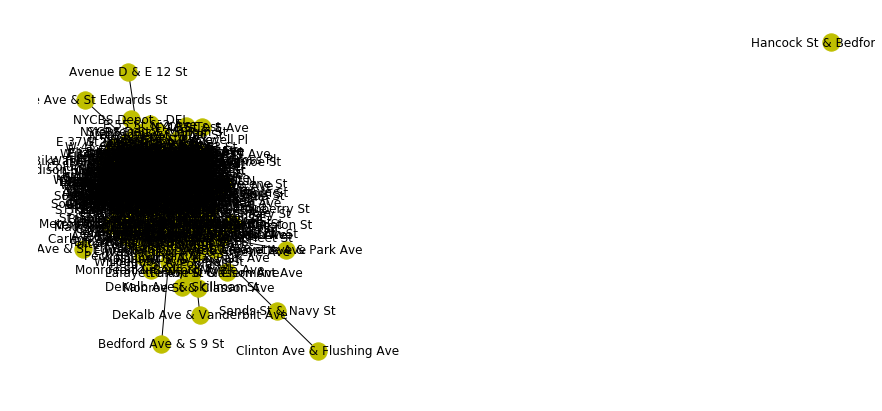

In [49]:
# Draw the graph of the network as is
fig, ax = plt.subplots(figsize=(15, 7))
nx.draw_spring(G, ax=ax, with_labels=True, node_color="y")

There is a large cluster of nodes in the  center of the graph.The graph on the outskirts are those that occur less than 10 times in the dataset as start or end stations. Further analysis of the graph will enable us to single out those specific graphs in the tight cluster.

In [40]:
density = nx.density(G)
print("Network density is :", density)

Network density is : 0.08757241769111206


Network density is a measure of the proportion of possible ties which are actualized among the members of a network. The proportion in this case is 0.88. This may indicate that on a large scale, there is strong direct connections between  stations via riders.

Given that the graph is not connected, I will now use: nx.connected_components to get the list of components,
 then use the max() command to find the largest one. Thereafter, i will create a "subgraph" of just the largest component.Then calculate the diameter of the subgraph. This should provide some interesting information.

In [34]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [35]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 6


Since we took the largest component, we can assume there is no larger diameter for the other components.  The network diameter of this network’s largest component is 6: there is a path length of 6 between the two farthest-apart nodes in the network. A plot of this subgraph is shown below.

<Figure size 1080x504 with 0 Axes>

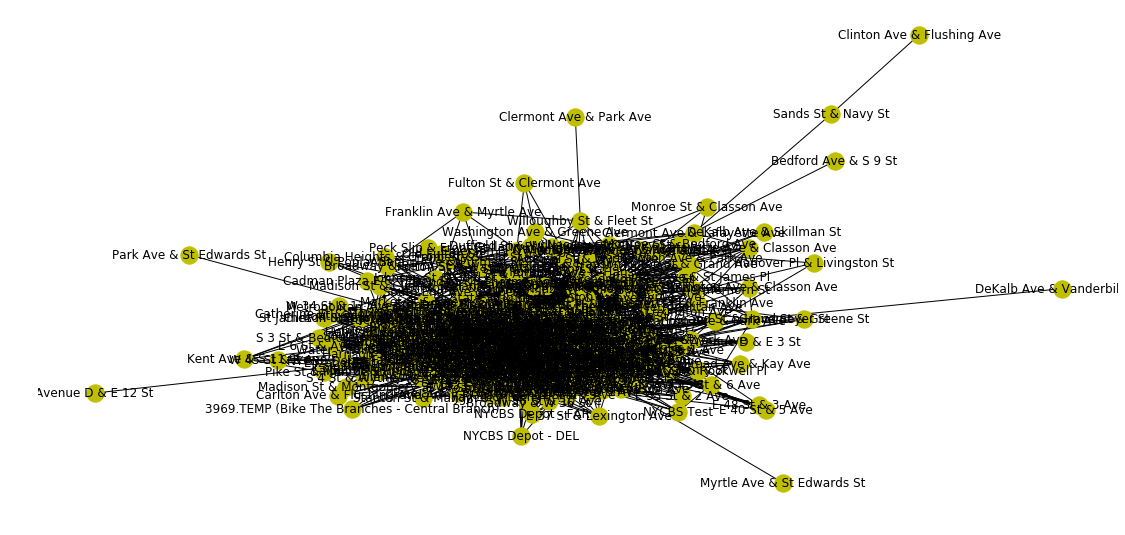

In [38]:
plt.figure(figsize=(15,7))
nx.draw_spring(subgraph,with_labels=True, node_color="y")

#### Other basic facts about the network  graph

Below is some basic information about the graph. There are 337 nodes, 4958 edges and an average degree of 29

In [41]:
nx.info(G) # Information about the graph

'Name: \nType: Graph\nNumber of nodes: 337\nNumber of edges: 4958\nAverage degree:  29.4243'

### Centrailty Measures

The first centrality measure we will look at is Degree Centraility. It is by means of ths measure that we can answer our first question, which is, to which station is most of the other stations connected.

In [44]:
deg = nx.degree(G)
#deg

*Top five stations with the least amount of connections*

In [47]:
# minimum number of degress that exist in the graph for each node
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1])
deg_list[0:5]


[('Clinton Ave & Flushing Ave', 1),
 ('Avenue D & E 12 St', 1),
 ('Park Ave & St Edwards St', 1),
 ('Bedford Ave & S 9 St', 1),
 ('Myrtle Ave & St Edwards St', 1)]

*Top  stations with the most connections.*

In [46]:
# top ten most influential according to degree
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[1:11]

[('E 17 St & Broadway', 90),
 ('Broadway & W 24 St', 84),
 ('Broadway & E 14 St', 81),
 ('Broadway & E 22 St', 80),
 ('W 20 St & 11 Ave', 79),
 ('8 Ave & W 31 St N', 76),
 ('Lafayette St & E 8 St', 74),
 ('Broadway & W 58 St', 71),
 ('W 41 St & 8 Ave', 67),
 ('9 Ave & W 14 St', 64)]

Of interest is how connected the route Broadway is. Station E 17 St & Broadway is  most unique start and  end destination in the sample and according to our degree centrality measures, also it has the most connections to the other stations.This was expected. Broadway & W 24 St station was the second most used end station and fourth most unique start station.The degree centrality measure for this station indicates that it is connected to some other 84 stations. Hence, based on this sample, i would recommend route Broadway as an idel route for setting up business realted to the sale of biking gear. Specifically such business can be located in the vicinity of Station E 17 St & Broadway   and 
Broadway & W 24 St station.

*Plot of these  degrees values to guage their distribution*

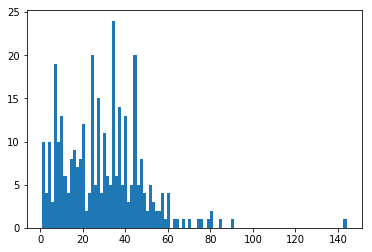

In [48]:
import matplotlib.pyplot as plot
degree_values = dict(deg).values()
h=plot.hist(degree_values,100)


The histogram helps us to visualise how the degrees of the different nodes on the network is distributed. Every node is connected to at least one other node. There distribution is also multimodal indicating  that there are quite a few subgraphs in the network. There is also an outlier in the distribution possibly station Hancock St & Bedford Ave   based on the graph shown earlier on or nan. The log plot below helps us to have a better view of the distribution.

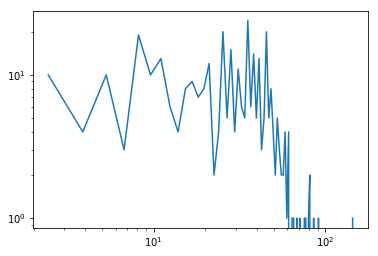

In [50]:

plot.loglog(h[1][1:],h[0])

**Closeness Centrality**

We will now look at the closeness centrality measures of the nodes in the  network.

In [52]:
c_c=nx.closeness_centrality(G) # dict of closeness measures
df= pd.DataFrame(list(c_c.items()), columns=['node', 'Closeness'])
top= df.nlargest(10, ['Closeness'])
print(top) 
bottom= df.nsmallest(10, ['Closeness'])
print(bottom) 

                      node  Closeness
27                     NaN   0.624305
2       E 17 St & Broadway   0.552071
123     Broadway & W 24 St   0.549347
180     Broadway & E 14 St   0.547546
132       W 20 St & 11 Ave   0.543979
160     Broadway & E 22 St   0.539585
202      8 Ave & W 31 St N   0.536120
47   Lafayette St & E 8 St   0.535261
19         9 Ave & W 14 St   0.526819
106        W 41 St & 8 Ave   0.526819
                            node  Closeness
309     Hancock St & Bedford Ave   0.000000
290   Clinton Ave & Flushing Ave   0.221048
335      Clermont Ave & Park Ave   0.269357
289           Sands St & Navy St   0.283775
327         Bedford Ave & S 9 St   0.285229
336  DeKalb Ave & Vanderbilt Ave   0.298483
333   Myrtle Ave & St Edwards St   0.323020
164     Fulton St & Clermont Ave   0.330369
311           Avenue D & E 12 St   0.332672
322     Park Ave & St Edwards St   0.334003


Closeness centrality is a measure of the average shortest distance from each vertex to each other vertex. Usually the graph with the lowest centrality measure has a more central importance or is the node that is closer to every other node on the network than any other node. In this case, station E 17 St & Broadway  is the most central followed by  station Broadway & W 24 St.

**Betweeness Centrality**

We will now look at the top ten and bottom ten betweeness centrality measures of the nodes in the network.

In [53]:
c_b=nx.betweenness_centrality(G) # dict of closeness measures
df1= pd.DataFrame(list(c_b.items()), columns=['node', 'Betweeness'])
top1= df1.nlargest(10,['Betweeness'])
print(top1)
bottom1= df1.nsmallest(10, ['Betweeness'])
print(bottom1) 

                             node  Betweeness
27                            NaN    0.067563
123            Broadway & W 24 St    0.022099
132              W 20 St & 11 Ave    0.020899
2              E 17 St & Broadway    0.020163
180            Broadway & E 14 St    0.019867
75       Cleveland Pl & Spring St    0.014272
106               W 41 St & 8 Ave    0.013771
160            Broadway & E 22 St    0.013362
22                Dean St & 4 Ave    0.012830
184  Clermont Ave & Lafayette Ave    0.012817
                            node  Betweeness
290   Clinton Ave & Flushing Ave    0.000000
309     Hancock St & Bedford Ave    0.000000
311           Avenue D & E 12 St    0.000000
322     Park Ave & St Edwards St    0.000000
327         Bedford Ave & S 9 St    0.000000
333   Myrtle Ave & St Edwards St    0.000000
335      Clermont Ave & Park Ave    0.000000
336  DeKalb Ave & Vanderbilt Ave    0.000000
334     DeKalb Ave & Skillman St    0.000007
304      Monroe St & Classon Ave    0.000014

Betweeness centrality is a measure of how often a given vertex lies on the shortest path between two other vertices. This can be thought of as a kind of “bridge” score, a measure of how much removing a node would disrupt the connections between other nodes in the network.  Station Broadway & W 24 St seems critical in this  sample network.

**Eigenvector Centrality**

We will now look at the eigenvector centrality measures of the nodes in the network.

In [54]:
c_e=nx.eigenvector_centrality(G) # dict of closeness measures
df2= pd.DataFrame(list(c_e.items()), columns=['node', 'eigenvalue'])
top= df2.nlargest(10, ['eigenvalue'])
print(top) 
bottom2= df2.nsmallest(10, ['eigenvalue'])
print(bottom2) 

                      node  eigenvalue
27                     NaN    0.214071
2       E 17 St & Broadway    0.143002
160     Broadway & E 22 St    0.134064
123     Broadway & W 24 St    0.129990
132       W 20 St & 11 Ave    0.129475
180     Broadway & E 14 St    0.126908
47   Lafayette St & E 8 St    0.120067
202      8 Ave & W 31 St N    0.118571
115     Broadway & W 58 St    0.112586
19         9 Ave & W 14 St    0.108983
                            node    eigenvalue
309     Hancock St & Bedford Ave  3.259784e-15
290   Clinton Ave & Flushing Ave  3.386086e-06
335      Clermont Ave & Park Ave  7.269439e-05
289           Sands St & Navy St  1.417844e-04
327         Bedford Ave & S 9 St  1.642180e-04
336  DeKalb Ave & Vanderbilt Ave  3.229218e-04
164     Fulton St & Clermont Ave  6.517023e-04
333   Myrtle Ave & St Edwards St  9.997244e-04
304      Monroe St & Classon Ave  1.092464e-03
323    Franklin Ave & Myrtle Ave  1.193484e-03


Eigenvector centrality is a measure of the influence a node has on a network. A high eigenvector score means that a node is connected to many nodes who themselves have high scores. In this case that node is station E 17 St & Broadway .

## Conclusions

Based on the sample of the citibike dataset used in this project, station E 17 St & Broadway seems to be a station that is most significant among the other stations, closely followed by station Broadway & W 24 St. Station E 17 St & Broadway  has the most destinations in this sample. According to  the various centrality measures investigated in this project, when compared with other stations, Station E 17 St & Broadway has the most connections and is also the most 'influential'. 'Influential' in the sense that maybe it is the most strategically located station. An investigation into they type of structures around this station might give indication as to why it is the lead start and end station for many other stations. As was pointed out before, it seems that route Broadway is a busy route for bikers. This information can be crucial for developing safety policies to protect riders who frequent these routes.
It should be noted that this ananlysis can in no way be  used generalisations as it has much limitations. Further work can include further data preprocessing and  analysing the subnetworks within the network.

**Ego graph**

Below is an ego graph which visualises the most significant node in the sample, station E 17 St & Broadway . It returns an induced subgraph of neighbors centered at node n within a given radius.

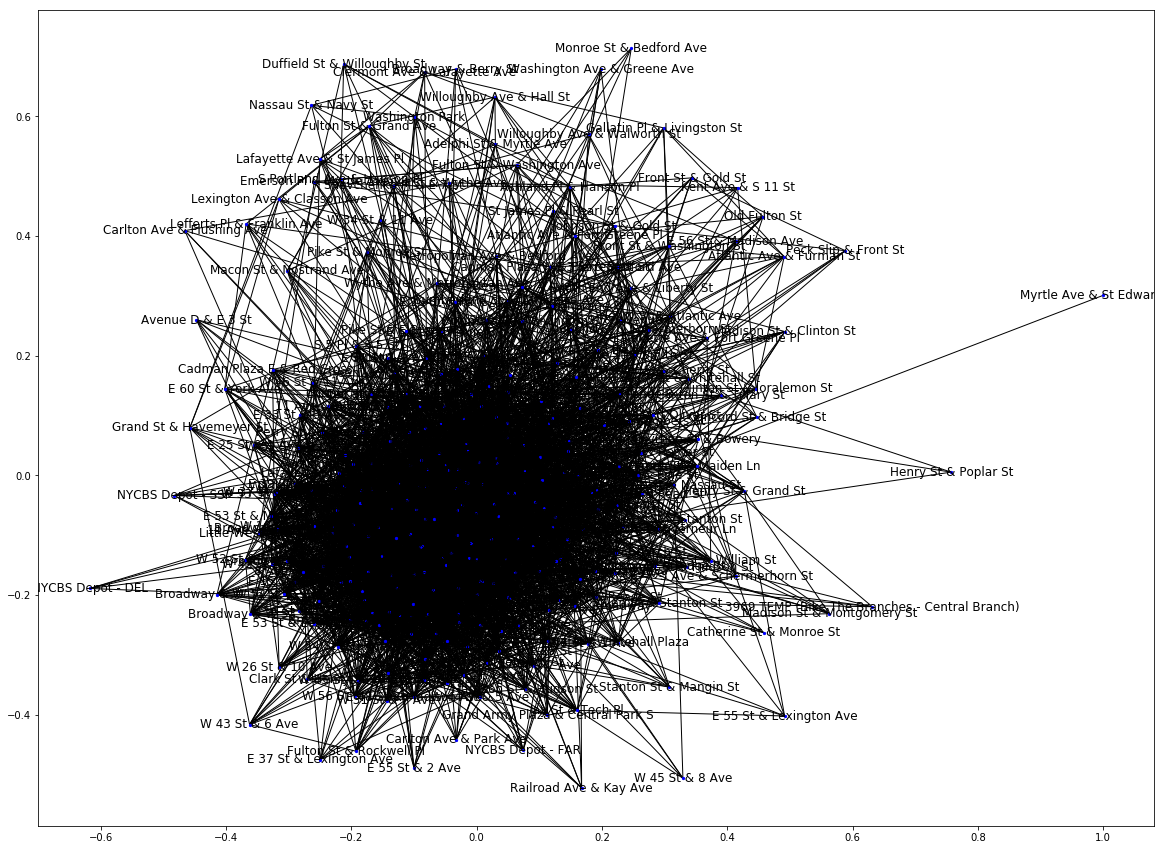

In [57]:
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_networkx(nx.ego_graph(G, 'E 17 St & Broadway', radius=2,center=True),  ax=ax, node_size=5, node_color='blue')